In [ ]:
pip install tensorflow

In [ ]:
pip install pandas


In [ ]:
pip install matplotlib

In [ ]:
pip install opencv-python

In [ ]:
pip install tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
 
train_path = "DATASET\DATASET\TRAIN" 
test_path = "DATASET\DATASET\TEST"
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
 
#visualization
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})
 
data.shape
 
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

Loading data: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]


Dataset shape: (22564, 2)


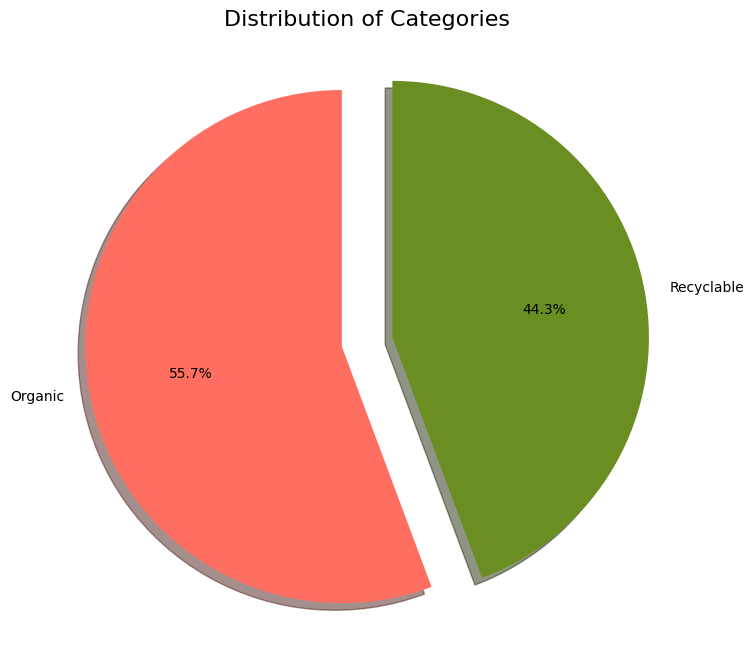

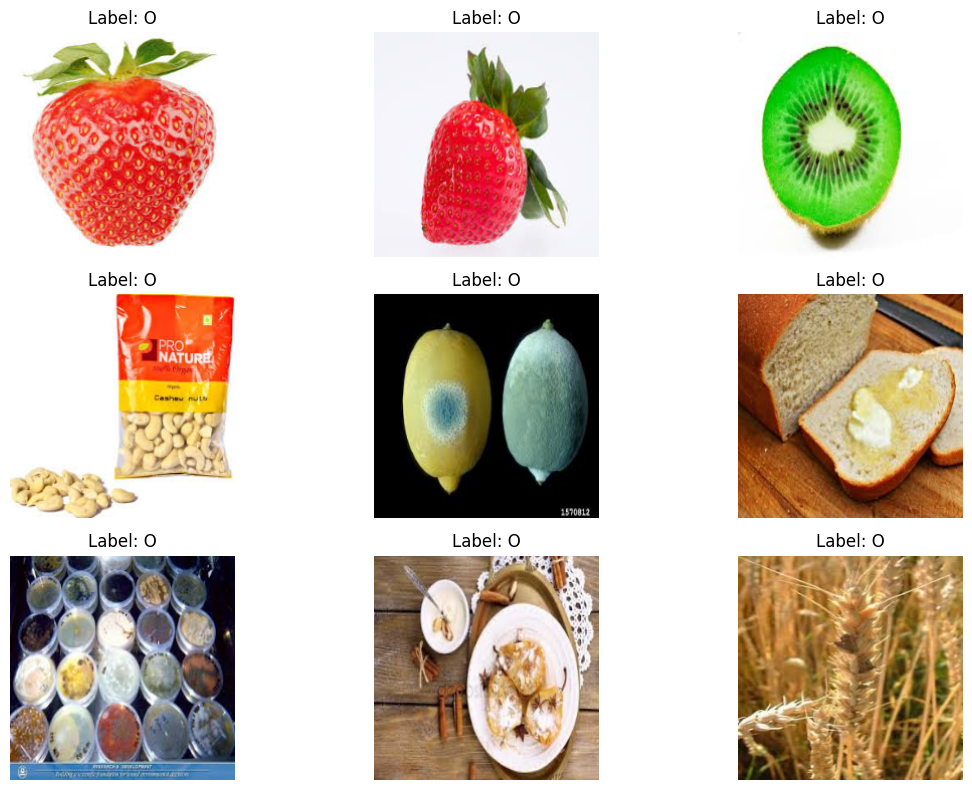

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import os

warnings.filterwarnings('ignore')

# Define paths (ensure you're using the correct paths)
train_path = os.path.join("DATASET", "DATASET", "TRAIN") 
test_path = os.path.join("DATASET", "DATASET", "TEST")

# Visualize and process images
x_data = []
y_data = []

for category in tqdm(glob(os.path.join(train_path, "*")), desc="Loading data", position=0, leave=True):
    for file in tqdm(glob(os.path.join(category, "*")), desc=f"Processing {category.split('/')[-1]}", position=1, leave=True):
        img_array = cv2.imread(file)
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (224, 224))  # Resize images to 224x224 for consistency
            x_data.append(img_array)
            y_data.append(category.split(os.path.sep)[-1])

# Creating DataFrame
data = pd.DataFrame({'image': x_data, "label": y_data})
print(f"Dataset shape: {data.shape}")

# Visualization - Pie Chart for label distribution
colors = ["#FF6F61", "#6B8E23"]  # Improved colors for a better look
plt.figure(figsize=(8, 8))
plt.pie(data['label'].value_counts(), labels=["Organic", "Recyclable"], autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=[0.1, 0.1], shadow=True)
plt.title("Distribution of Categories", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

# Displaying a few sample images from the dataset
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = x_data[i]
    plt.imshow(img)
    plt.title(f"Label: {y_data[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
